< [Module 4-1: Analyse statistique](04-statistiques.ipynb) | [Contents](index.ipynb) | [Module 4-3: Visualisation de données](04-visualisation.ipynb) >

In [6]:
%pylab
%matplotlib inline
import statsmodels.api as sm
import pandas as pd
from pandas.plotting import parallel_coordinates, scatter_matrix
from scipy import stats


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/media/data/Research/Code/venv3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Analyse de la variance (ANOVA)

In [4]:
F, p = stats.f_oneway([1,2,3],[5,6,7])
print(F, p)

24.0 0.00804989310084


# Corrélation

In [8]:
# jeu de données de voitures http://lib.stat.cmu.edu/DASL/Datafiles/Cars.html
import io
text = '''Country	Car	MPG	Weight	Drive_Ratio	Horsepower	Displacement	Cylinders
U.S.	Buick Estate Wagon	16.9	4.360	2.73	155	350	8
U.S.	Ford Country Squire Wagon	15.5	4.054	2.26	142	351	8
U.S.	Chevy Malibu Wagon	19.2	3.605	2.56	125	267	8
U.S.	Chrysler LeBaron Wagon	18.5	3.940	2.45	150	360	8
U.S.	Chevette	30.0	2.155	3.70	68	98	4
Japan	Toyota Corona	27.5	2.560	3.05	95	134	4
Japan	Datsun 510	27.2	2.300	3.54	97	119	4
U.S.	Dodge Omni	30.9	2.230	3.37	75	105	4
Germany	Audi 5000	20.3	2.830	3.90	103	131	5
Sweden	Volvo 240 GL	17.0	3.140	3.50	125	163	6
Sweden	Saab 99 GLE	21.6	2.795	3.77	115	121	4
France	Peugeot 694 SL	16.2	3.410	3.58	133	163	6
U.S.	Buick Century Special	20.6	3.380	2.73	105	231	6
U.S.	Mercury Zephyr	20.8	3.070	3.08	85	200	6
U.S.	Dodge Aspen	18.6	3.620	2.71	110	225	6
U.S.	AMC Concord D/L	18.1	3.410	2.73	120	258	6
U.S.	Chevy Caprice Classic	17.0	3.840	2.41	130	305	8
U.S.	Ford LTD	17.6	3.725	2.26	129	302	8
U.S.	Mercury Grand Marquis	16.5	3.955	2.26	138	351	8
U.S.	Dodge St Regis	18.2	3.830	2.45	135	318	8
U.S.	Ford Mustang 4	26.5	2.585	3.08	88	140	4
U.S.	Ford Mustang Ghia	21.9	2.910	3.08	109	171	6
Japan	Mazda GLC	34.1	1.975	3.73	65	86	4
Japan	Dodge Colt	35.1	1.915	2.97	80	98	4
U.S.	AMC Spirit	27.4	2.670	3.08	80	121	4
Germany	VW Scirocco	31.5	1.990	3.78	71	89	4
Japan	Honda Accord LX	29.5	2.135	3.05	68	98	4
U.S.	Buick Skylark	28.4	2.670	2.53	90	151	4
U.S.	Chevy Citation	28.8	2.595	2.69	115	173	6
U.S.	Olds Omega	26.8	2.700	2.84	115	173	6
U.S.	Pontiac Phoenix	33.5	2.556	2.69	90	151	4
U.S.	Plymouth Horizon	34.2	2.200	3.37	70	105	4
Japan	Datsun 210	31.8	2.020	3.70	65	85	4
Italy	Fiat Strada	37.3	2.130	3.10	69	91	4
Germany	VW Dasher	30.5	2.190	3.70	78	97	4
Japan	Datsun 810	22.0	2.815	3.70	97	146	6
Germany	BMW 320i	21.5	2.600	3.64	110	121	4
Germany	VW Rabbit	31.9	1.925	3.78	71	89	4
'''
s = io.StringIO(text)
data = pd.read_csv(s, delimiter = '\t')

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
MPG,1.000000,-0.903071,0.417225,-0.871282,-0.786048,-0.805511
Weight,-0.903071,1.000000,-0.687880,0.917220,0.950765,0.916678
Drive_Ratio,0.417225,-0.687880,1.000000,-0.588906,-0.798273,-0.692150
Horsepower,-0.871282,0.917220,-0.588906,1.000000,0.871799,0.863847
Displacement,-0.786048,0.950765,-0.798273,0.871799,1.000000,0.940281
Cylinders,-0.805511,0.916678,-0.692150,0.863847,0.940281,1.000000


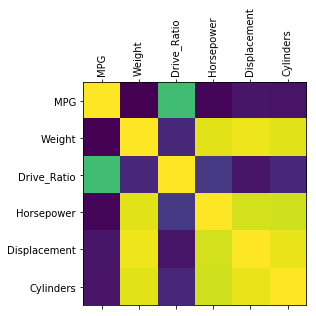

In [24]:
headers = ['MPG','Weight','Drive_Ratio','Horsepower', 'Displacement', 'Cylinders']
corr = data[headers].corr()
plt.figure()
plt.matshow(corr)
plt.xticks(range(len(headers)), headers, rotation=90)
plt.yticks(range(len(headers)), headers)
corr

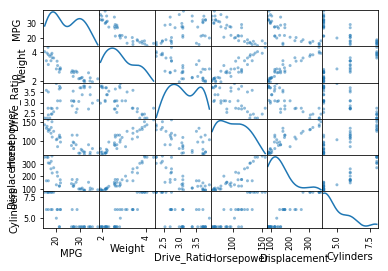

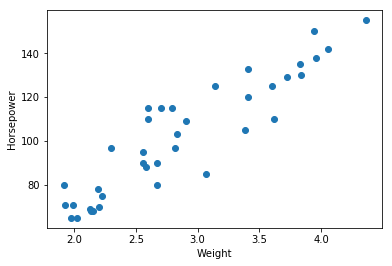

In [30]:
plt.figure()
scatter_matrix(data[headers], diagonal='kde')
plt.figure()
plt.scatter(data.Weight, data.Horsepower)
plt.xlabel('Weight')
plt.ylabel('Horsepower')

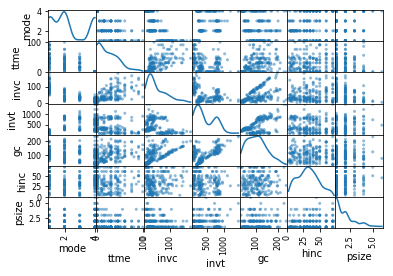

In [23]:
# modele logit binaire (probabilite de marcher) et multinomial (choix de mode / gravite des accidents)
# Travel Mode Choice
modechoices = sm.datasets.modechoice.load_pandas()
#print(modechoices.data.info())
#modechoices.data.describe()
data = modechoices.data[modechoices.data['choice'] == 1.]
#print(data.info(), data['mode'])
#parallel_coordinates(data, 'mode')
cols = data.columns
#print(cols)
res=scatter_matrix(data[['mode', 'ttme', 'invc', 'invt', 'gc', 'hinc', 'psize']], diagonal='kde')


In [26]:
model = sm.MNLogit(modechoices.endog, modechoices.exog)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.499751
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 choice   No. Observations:                  840
Model:                        MNLogit   Df Residuals:                      834
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Aug 2017   Pseudo R-squ.:                  0.1113
Time:                        15:24:37   Log-Likelihood:                -419.79
converged:                       True   LL-Null:                       -472.36
                                        LLR p-value:                 4.350e-21
  choice=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ttme          -0.0434      0.005     -8.972      0.000      -0.053      -0.034
invc           0.0028      0.